# Recommended reading


* Think Bayes: Bayesian Statistics in Python by Allen B. Downey
* Information Theory, Inference and Learning Algorithms by David J. C. MacKay



# Definitions

**Joint probability** $p(a,b)$

a, b are independent random variables if and only if $p(a,b) = p(a)p(b)$

**Marginal probability** $p(a) = \sum_b {p(a,b)}$

If b is a continuous variable, sum is replaced by an integral. 
Sum or integral operation is also called **marginalization**

**Conditional probability** $p(a~|~b) = \frac{p(a,b)}{p(b)}$

From this follows that $p(a,b) = p(a~|~b)~p(b) = p(b~|~a)~p(a)$ and Bayes' theorem in classic form:

$$p(a~|~b) = \frac{p(b~|~a)~p(a)}{p(b)}$$

**Probability** is a degree of *belief*  in a proposition

# Example 1

Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

$$ p(bowl~1~|~vanilla) = \frac{p(vanilla~|~bowl~1)~p(bowl~1)}{p(vanilla)}  = 
\frac{\frac{3}{4} \frac{1}{2}}{\frac{5}{8}} = \frac{3}{5} $$



# Bayesian data modeling

Model $\mathscr{H}$ is set of assumptions on which probability is based.

$$ p(model~parameters~|~data, model~type) = 
\frac {p(data~|~model~type, model~parameters)~p(model~type, model~parameters)} 
{p(data~|~model~type)} $$

$ p(model~type, model~parameters) $ is called **prior probability** or **prior beliefs**

$ p(model~parameters~|~data, model~type)$ is called **posterior probability** or **posterior beliefs**

$ p(data~|~model~type, model~parameters) $ is called **likelihood** of the parameters given the data

$ p(data~|~model~type) = \sum_{model~parameters} {p(data~|~model~type, model~parameters)~p(model~type, model~parameters)} $ is called **evidence** and is a normalizing constant


## Example 2
You toss a coin, it is heads. What is the probability that it will be heads in the second toss?

To model a coin we will use [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).
It has one parameter q, which is the probability of heads. Then the likelihood function based on one trial is:

$$p(d~|~q) = q^d~(1-1)^{1-d}$$

Where d is 1 if it is head and 0 if tails, and q is the unknown parameter of Bernoulli distribution.

Uniform prior: when we do not have any prior beliefs about the parameter q, so any value of $q \in [0,1]$ is equally likely

$$p(q) = 1 $$

Posterior distribution in this case is:

$$p(q~|~d) \propto p(d~|~q) = q^d~(1-1)^{1-d}$$

In our case d = 1, and we also add normalization constant:

$$ p(q~|~d=1) = 2q$$

We will plot it:

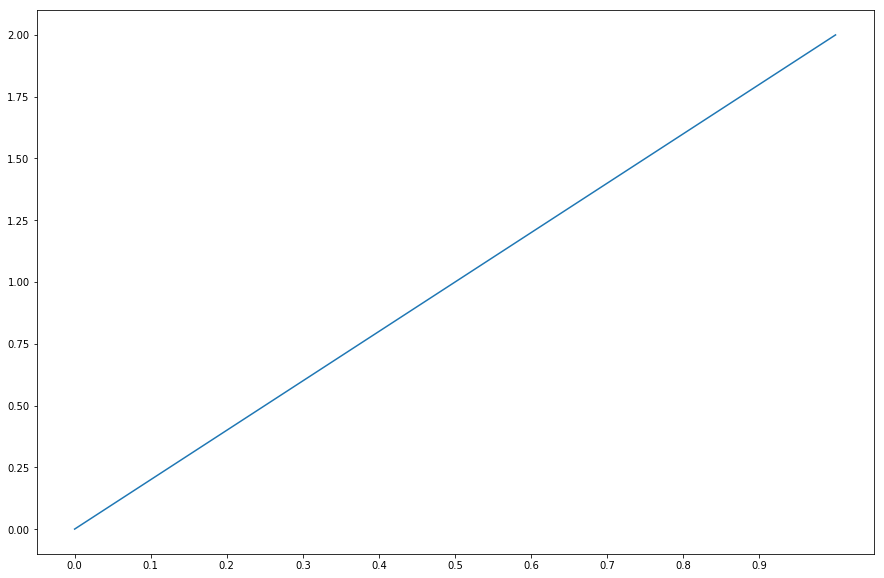

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
q = np.linspace(0, 1, 1000)
ax.xaxis.set_ticks(np.arange(0, 1.0, 0.1))
ax.plot(q, 2*q);


Your next coin:

$$ p(d2 = 1 | d1 = 1) = $$